In [1]:
import sys # required for relative imports in jupyter lab
sys.path.insert(0, '../') 

from dataset import QM7, QM7b, QM7X, QM9, ANI1x



RDKit WARNING: [20:37:14] Enabling RDKit 2019.09.3 jupyter extensions


In [2]:
ds_params = {'train_params': {'n': 10000, 
                              'features': ['coulomb'],
                              'embeds': [], 
                              'targets': ['U0'],
                              'pad': 29, 
                              'filter_on': None,
                              'use_pickle': False,
                              'flatten': True}}

qm9 = QM9(**ds_params['train_params'])

creating QM9 dataset...
QM9 molecules scanned:  1
QM9 molecules created:  1
total uncharacterized molecules removed:  273
total QM9 molecules created:  9727
CDataset created...


In [3]:
mol = qm9.ds[100]
print(mol)

./data/qm9/qm9.xyz/dsgdb9nsd_000100


In [4]:
dir(mol)

['A',
 'B',
 'C',
 'Cv',
 'G',
 'H',
 'U',
 'U0',
 '__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 'adjacency',
 'alpha',
 'atom_type',
 'atomic_n',
 'coulomb',
 'create_adjacency',
 'create_coulomb',
 'create_distance',
 'distance',
 'gap',
 'homo',
 'in_file',
 'load_data',
 'lumo',
 'mol_block',
 'mu',
 'mulliken',
 'n_atoms',
 'open_file',
 'properties',
 'qm9_block',
 'r2',
 'rdmol',
 'rdmol_from_smile',
 'smile',
 'sort_permute',
 'testtesttest',
 'xyz',
 'zpve']

In [5]:
print(mol.mol_block)


     RDKit          2D

 15 15  0  0  0  0  0  0  0  0999 V2000
    1.8302    1.1491    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.8660    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.4330    0.7500    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.4330   -0.7500    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0800   -2.1595    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.7944    2.2981    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
    0.9095    2.1364    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
    2.9793    0.1849    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
    1.8534   -0.9207    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.9102    1.0105    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
   -0.1294    2.0654    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.9102   -1.0105    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
    0.5930   -3.5691    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.3295   -2.6726    0

In [6]:
mol.mol_block

'\n     RDKit          2D\n\n 15 15  0  0  0  0  0  0  0  0999 V2000\n    1.8302    1.1491    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    0.8660    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n   -0.4330    0.7500    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n   -0.4330   -0.7500    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    0.0800   -2.1595    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    2.7944    2.2981    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0\n    0.9095    2.1364    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0\n    2.9793    0.1849    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0\n    1.8534   -0.9207    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0\n   -1.9102    1.0105    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0\n   -0.1294    2.0654    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0\n   -1.9102   -1.0105    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0\n    0.5930   -3.5691    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0\n   -1.3

In [7]:
mol.atom_type

['C', 'C', 'C', 'C', 'C', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H']

In [8]:
mol.properties

['A',
 'B',
 'C',
 'mu',
 'alpha',
 'homo',
 'lumo',
 'gap',
 'r2',
 'zpve',
 'U0',
 'U',
 'H',
 'G',
 'Cv',
 'smile',
 'n_atoms',
 'xyz',
 'mulliken']

In [9]:
mol.smile

'CC1CC1C\tC[C@H]1C[C@H]1C\t\n'

In [10]:
mol.qm9_block

['15\n',
 'gdb 100\t7.14221\t4.37083\t3.30265\t0.1023\t52.92\t-0.2632\t0.094\t0.3573\t465.3301\t0.137341\t-196.406419\t-196.40034\t-196.399396\t-196.435152\t22.005\t\n',
 'C\t-0.0518984955\t 1.5521743484\t-0.103184376\t-0.402017\n',
 'C\t 0.0122664775\t 0.0469067539\t 0.0374752004\t 0.021774\n',
 'C\t 1.3011569171\t-0.7066155329\t-0.1972572405\t-0.290689\n',
 'C\t 0.7043193884\t-0.6489323916\t 1.1900356187\t 0.021779\n',
 'C\t 1.3975032424\t 0.0948127989\t 2.3107801094\t-0.402018\n',
 'H\t 0.8740420881\t 2.0354317078\t 0.2216222842\t 0.114219\n',
 'H\t-0.2164135675\t 1.8369527829\t-1.1485295788\t 0.115359\n',
 'H\t-0.8715764599\t 1.9767368438\t 0.4879704596\t 0.113684\n',
 'H\t-0.885082055\t-0.4559694079\t-0.3158078641\t 0.078126\n',
 'H\t 1.2766365763\t-1.6414902176\t-0.7469796667\t 0.104702\n',
 'H\t 2.194240669\t-0.1140412081\t-0.3756935917\t 0.103695\n',
 'H\t 0.2167246071\t-1.5637793412\t 1.5190239983\t 0.078125\n',
 'H\t 1.9131735597\t 0.9905117518\t 1.9527174745\t 0.114218\n',
 

In [19]:
mol.xyz

[array([-0.05189849,  1.5521743 , -0.10318438], dtype=float32),
 array([0.01226648, 0.04690675, 0.0374752 ], dtype=float32),
 array([ 1.3011569 , -0.7066155 , -0.19725724], dtype=float32),
 array([ 0.7043194, -0.6489324,  1.1900356], dtype=float32),
 array([1.3975033, 0.0948128, 2.31078  ], dtype=float32),
 array([0.8740421 , 2.0354316 , 0.22162229], dtype=float32),
 array([-0.21641357,  1.8369528 , -1.1485295 ], dtype=float32),
 array([-0.8715765 ,  1.9767369 ,  0.48797047], dtype=float32),
 array([-0.88508207, -0.4559694 , -0.31580788], dtype=float32),
 array([ 1.2766366 , -1.6414902 , -0.74697965], dtype=float32),
 array([ 2.1942406 , -0.11404121, -0.3756936 ], dtype=float32),
 array([ 0.2167246, -1.5637794,  1.519024 ], dtype=float32),
 array([1.9131736, 0.9905118, 1.9527174], dtype=float32),
 array([0.6873801 , 0.40901467, 3.0844698 ], dtype=float32),
 array([ 2.1493464, -0.5415181,  2.7911155], dtype=float32)]

In [11]:
qm9[100]

(array([36.858112 , 15.22497  , 19.002047 , 25.10993  , 25.110044 ,
         8.303192 , 12.390034 , 12.389928 , 13.229085 ,  8.302856 ,
        10.002762 , 10.003661 ,  8.779216 , 13.833648 , 13.2297735,
         0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  0.       , 15.224948 ,
        36.858112 , 19.002047 , 25.10993  , 25.110044 ,  8.303192 ,
        12.390034 , 12.389928 , 13.229085 ,  8.302856 , 10.002762 ,
        10.003661 ,  8.779216 , 13.833648 , 13.2297735,  0.       ,
         0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       , 15.224948 , 15.22497  ,
        36.858112 , 25.10993  , 25.110044 ,  8.303192 , 12.390034 ,
        12.389928 , 13.229085 ,  8.302856 , 10.002762 , 10.003661 ,
         8.779216 , 13.833648 , 13.2297735,  0. 

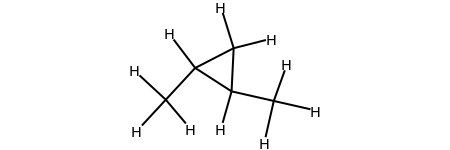

In [12]:
mol.rdmol

In [13]:
print(mol.rdmol.GetNumAtoms())

15


In [16]:
mol.adjacency

array([[0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [17]:
mol.distance

array([[0.       , 1.5131863, 2.6347182, 2.6625466, 3.170472 , 1.0938021,
        1.0958606, 1.0961703, 2.184501 , 3.518376 , 2.8099246, 3.5231926,
        2.8989146, 3.4661918, 4.1959505],
       [1.5131863, 0.       , 1.511335 , 1.5137783, 2.6625347, 2.17504  ,
        2.1594367, 2.1698775, 1.0876248, 2.2504857, 2.2265723, 2.1979764,
        2.8586695, 3.1418269, 3.5349524],
       [2.6347182, 1.511335 , 0.       , 1.5113318, 2.6347337, 2.8065476,
        3.1108968, 3.5200408, 2.203751 , 1.084798 , 1.0865461, 2.2037115,
        2.8066344, 3.5200973, 3.1107965],
       [2.6625466, 1.5137783, 1.5113318, 0.       , 1.513185 , 2.858748 ,
        3.535005 , 3.1417325, 2.1979527, 2.250499 , 2.2265403, 1.0876245,
        2.1750376, 2.1698895, 2.1594207],
       [3.170472 , 2.6625347, 2.6347337, 1.513185 , 0.       , 2.8990676,
        4.196022 , 3.465977 , 3.5231407, 3.518416 , 2.8099022, 2.1845007,
        1.0938014, 1.0961722, 1.0958592],
       [1.0938021, 2.17504  , 2.8065476, 2.858748 

In [18]:
mol.coulomb

array([[36.858112 , 15.22497  , 19.002047 , 25.10993  , 25.110044 ,
         8.303192 , 12.390034 , 12.389928 , 13.229085 ,  8.302856 ,
        10.002762 , 10.003661 ,  8.779216 , 13.833648 , 13.2297735],
       [15.224948 , 36.858112 , 19.002047 , 25.10993  , 25.110044 ,
         8.303192 , 12.390034 , 12.389928 , 13.229085 ,  8.302856 ,
        10.002762 , 10.003661 ,  8.779216 , 13.833648 , 13.2297735],
       [15.224948 , 15.22497  , 36.858112 , 25.10993  , 25.110044 ,
         8.303192 , 12.390034 , 12.389928 , 13.229085 ,  8.302856 ,
        10.002762 , 10.003661 ,  8.779216 , 13.833648 , 13.2297735],
       [15.224948 , 15.22497  , 19.002047 , 36.858112 , 25.110044 ,
         8.303192 , 12.390034 , 12.389928 , 13.229085 ,  8.302856 ,
        10.002762 , 10.003661 ,  8.779216 , 13.833648 , 13.2297735],
       [15.224948 , 15.22497  , 19.002047 , 25.10993  , 36.858112 ,
         8.303192 , 12.390034 , 12.389928 , 13.229085 ,  8.302856 ,
        10.002762 , 10.003661 ,  8.779216 , 